In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
df = pd.read_csv("Dump.csv")
df.shape

(46608, 16)

In [6]:
df.head(10)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,NaN,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e4

In [7]:
df = df.drop(['Unnamed: 0','movein','Agent_id','source_city','source_country','utm_source','utm_medium','des_city','des_country','lead_id'],axis =1)
df.head()

,status,lost_reason,budget,lease,source,room_type
0,LOST,Not responding,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN
1,LOST,Low budget,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,Ensuite
3,LOST,Low budget,0-0,0,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,NaN
4,LOST,Junk lead,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN


In [8]:
df.budget.value_counts().nunique()

87

In [9]:
df.budget.value_counts().head(10)

£60 - £120 Per week     9862
£121 - £180 Per Week    8954
0-0                     5733
£181 - £240 Per Week    2171
100                     1516
150                     1088
£241 - £300 Per week     720
> 300£ Per Week          698
200                      644
120                      550
Name: budget, dtype: int64

In [10]:
df.room_type.value_counts()

Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [11]:
df.source.value_counts().head(10)

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    19306
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0     5977
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     3809
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     3593
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     2220
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     2134
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     2099
9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54     1020
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831      993
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3      633
Name: source, dtype: int64

In [12]:
df.source.value_counts().nunique()

59

In [13]:
df.lease.value_counts().head(10)

Full Year Course Stay 40 - 44 weeks           11111
0                                              7551
Complete Education Year Stay 50 - 52 weeks     6538
51                                             3963
Semester Stay 20 - 24 weeks                    2770
Summer/Short Stay 8 - 12 weeks                 2255
lease                                          1648
full-course-stay                               1222
full-year-stay                                  960
Other                                           943
Name: lease, dtype: int64

In [14]:
df.lease.value_counts().nunique()

59

In [15]:
df.room_type.value_counts().head(10)

Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [16]:
df.lost_reason.value_counts().head(10)

Low availability               8892
Not responding                 7827
Not interested                 6449
Low budget                     5505
Wants private accommodation    2781
Short stay                     2264
Not a student                  1518
Just Enquiring                 1263
Inadequate details              827
Semester stay                   817
Name: lost_reason, dtype: int64

In [17]:
df.lost_reason.value_counts().nunique()

29

In [18]:
df.isnull().sum()

status             0
lost_reason     3364
budget          3700
lease           2341
source             0
room_type      23547
dtype: int64

In [19]:
hex_str = '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'

In [20]:
df = df.replace(hex_str, np.nan)

In [21]:
df.isnull().sum()
#These many missing values in the dataset

status             0
lost_reason     3364
budget          3700
lease           2341
source          5977
room_type      23547
dtype: int64

In [22]:
df.shape

(46608, 6)

In [23]:
df.columns

Index(['status', 'lost_reason', 'budget', 'lease', 'source', 'room_type'], dtype='object')

##### Missing Value Imputation with Mode

In [24]:
df.fillna(df.mode().iloc[0], inplace=True)

In [25]:
df.isnull().sum()

status         0
lost_reason    0
budget         0
lease          0
source         0
room_type      0
dtype: int64

In [26]:
df.status.value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [27]:
df = df.drop(index=df[df['status'] == 'OPPORTUNITY'].index)
df = df.drop(index=df[df['status'] == 'CONTACTED'].index)
df = df.drop(index=df[df['status'] == 'PROCESSING'].index)
df = df.drop(index=df[df['status'] == 'IMPORTANT'].index)

In [28]:
df.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

Text(0.5, 1.0, 'Pie Chart For Status')

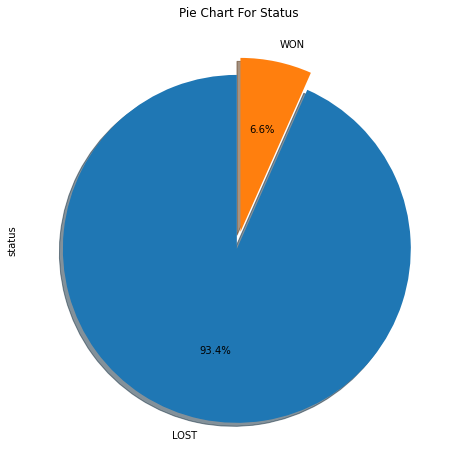

In [29]:
df['status'].value_counts().plot.pie(explode=[0.05,0.05],autopct = '%1.1f%%',startangle=90,shadow=True,figsize=(8,8))
plt.title('Pie Chart For Status')

In [30]:
df.dtypes

status         object
lost_reason    object
budget         object
lease          object
source         object
room_type      object
dtype: object

<AxesSubplot:xlabel='lost_reason'>

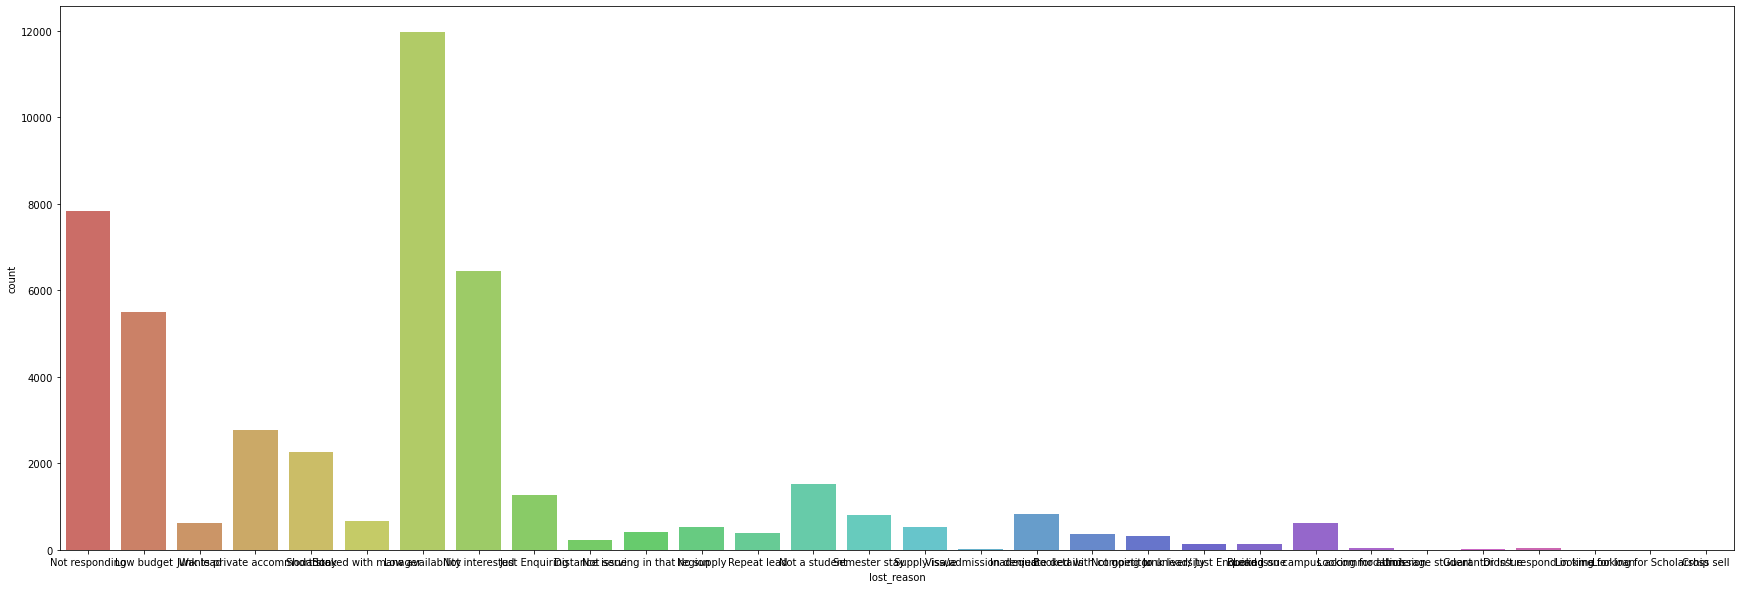

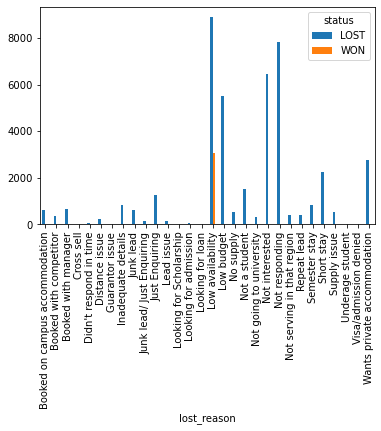

In [31]:
fig = plt.figure(figsize=(30,10))
sns.countplot(x="lost_reason",data=df,palette="hls",figure = fig)
pd.crosstab(df.lost_reason,df.status).plot(kind="bar")

<AxesSubplot:xlabel='room_type'>

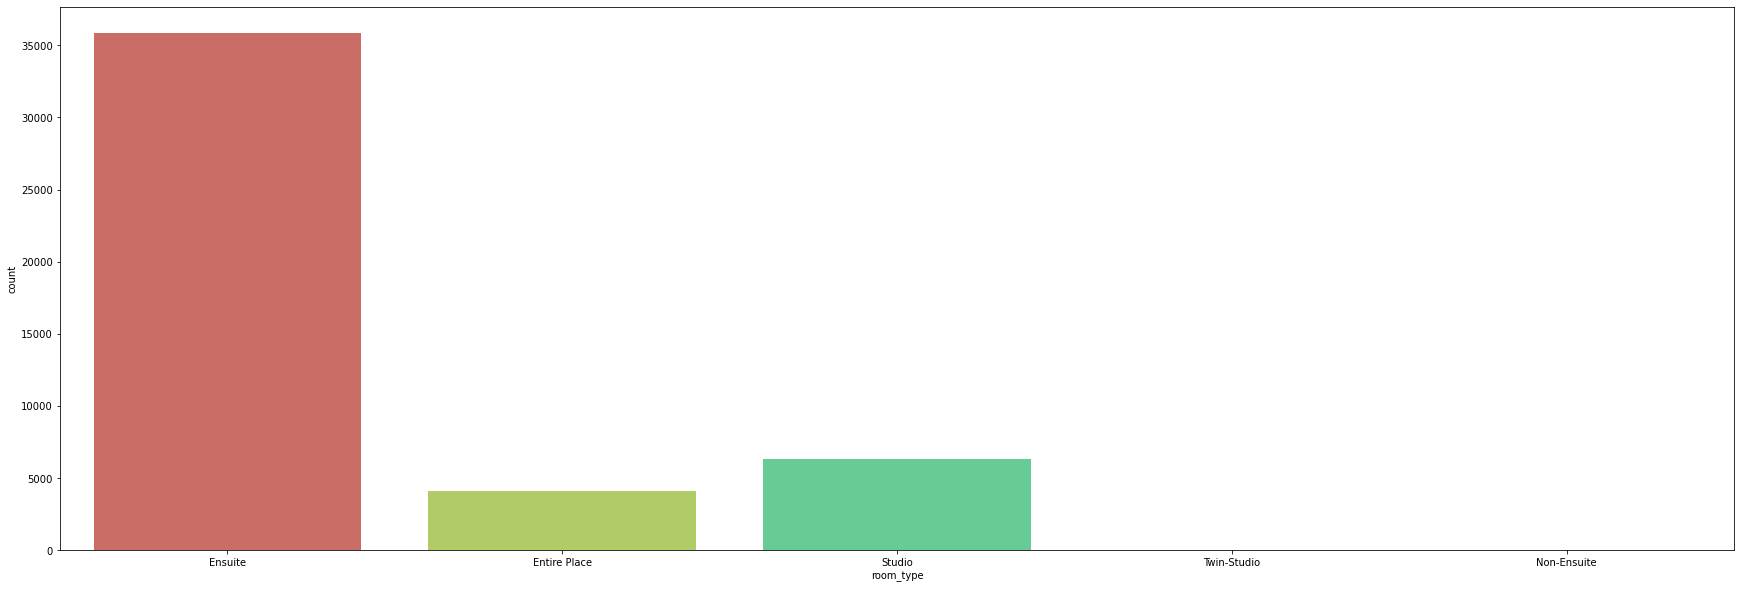

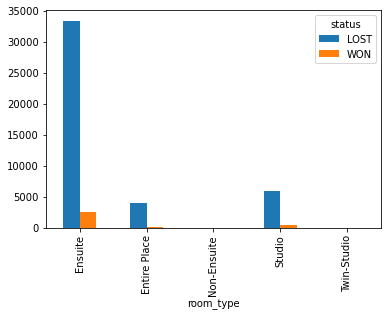

In [32]:
fig = plt.figure(figsize=(30,10))
sns.countplot(x="room_type",data=df,palette="hls",figure = fig)
pd.crosstab(df.room_type,df.status).plot(kind="bar")

<AxesSubplot:xlabel='lease'>

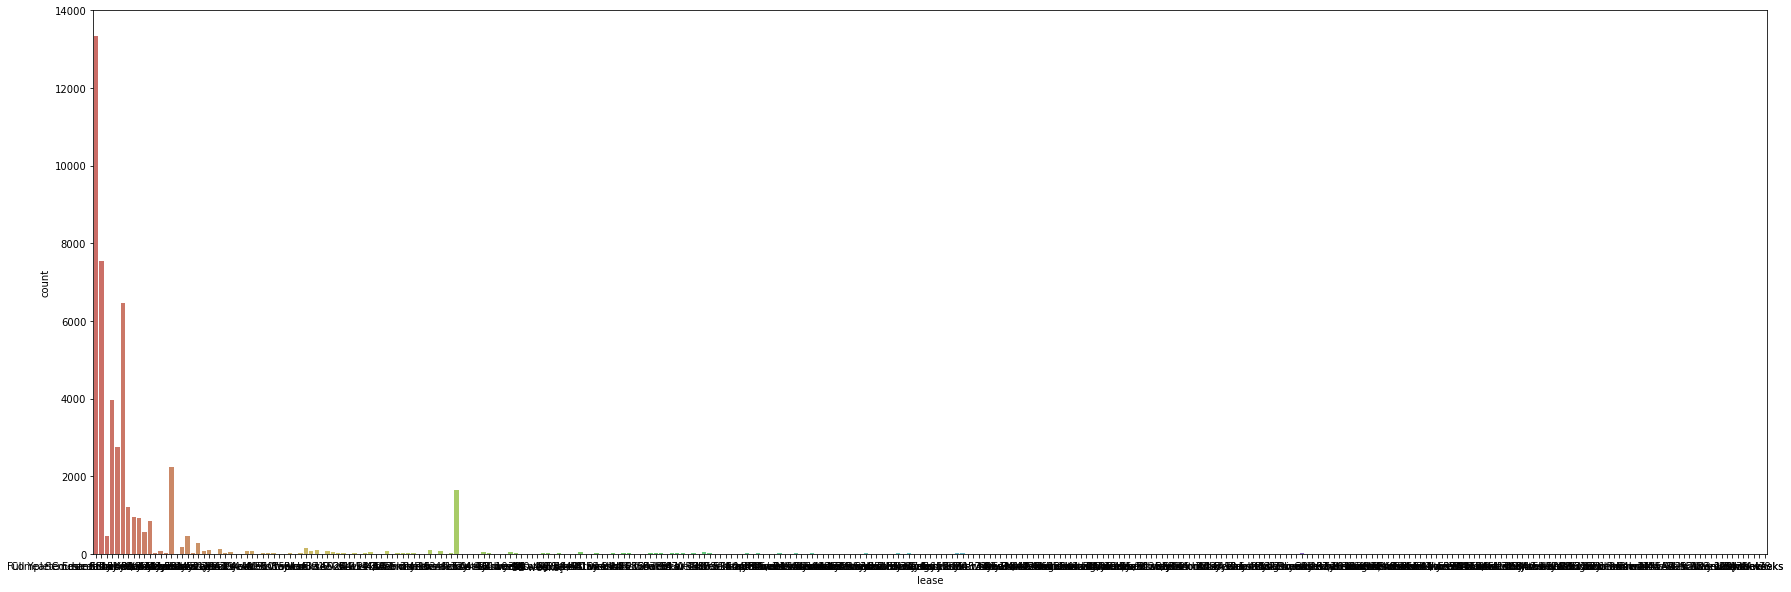

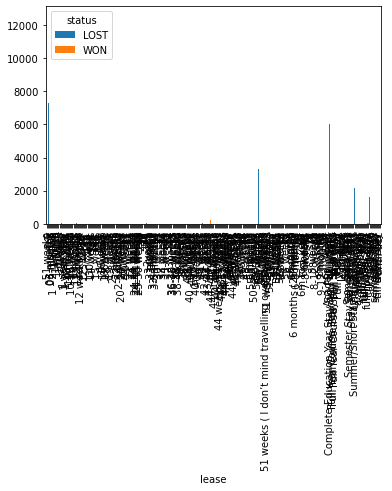

In [33]:
fig = plt.figure(figsize=(30,10))
sns.countplot(x="lease",data=df,palette="hls",figure = fig)
pd.crosstab(df.lease,df.status).plot(kind="bar")

<AxesSubplot:xlabel='budget'>

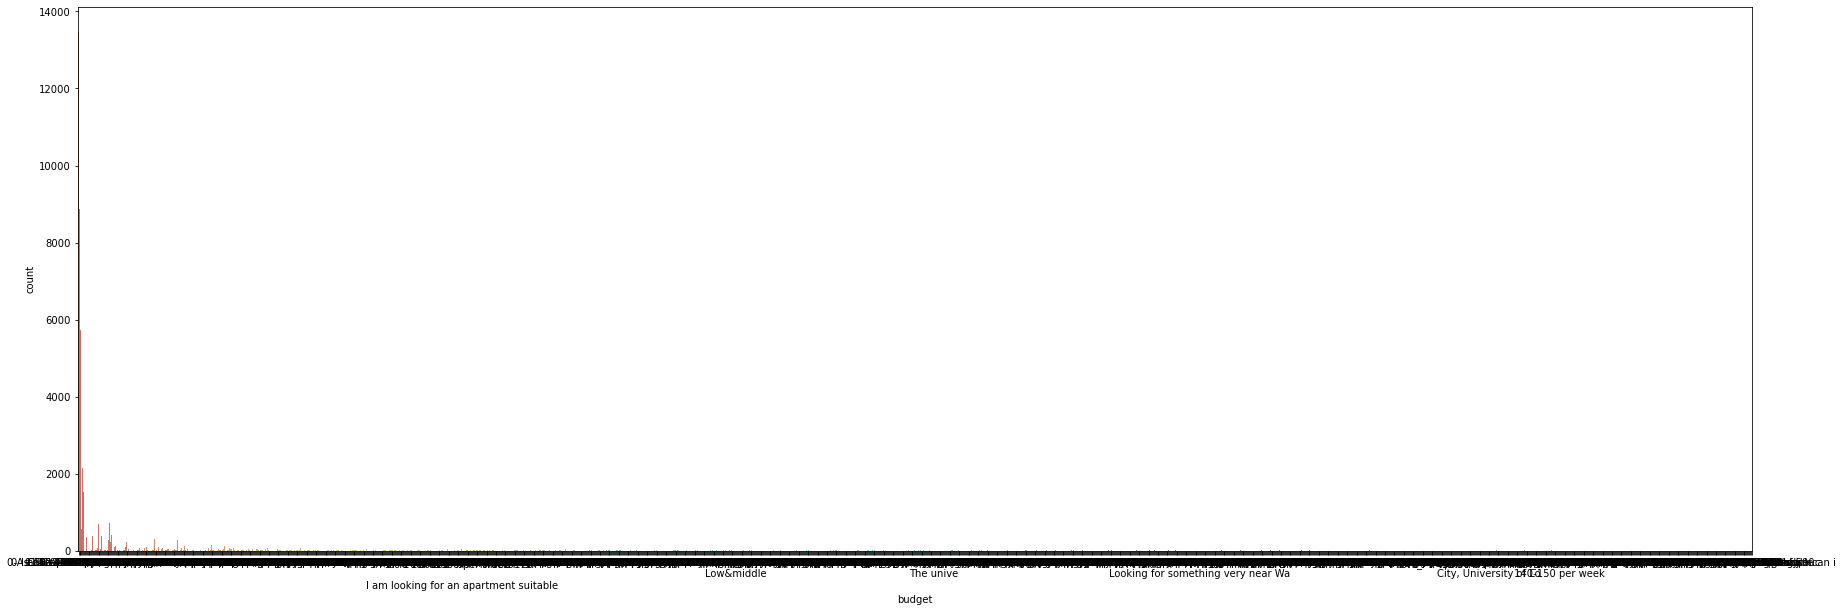

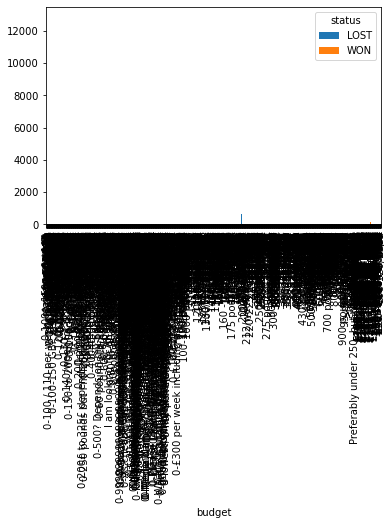

In [34]:
fig = plt.figure(figsize=(30,10))
sns.countplot(x="budget",data=df,palette="hls",figure = fig)
pd.crosstab(df.budget,df.status).plot(kind="bar")

<AxesSubplot:xlabel='source'>

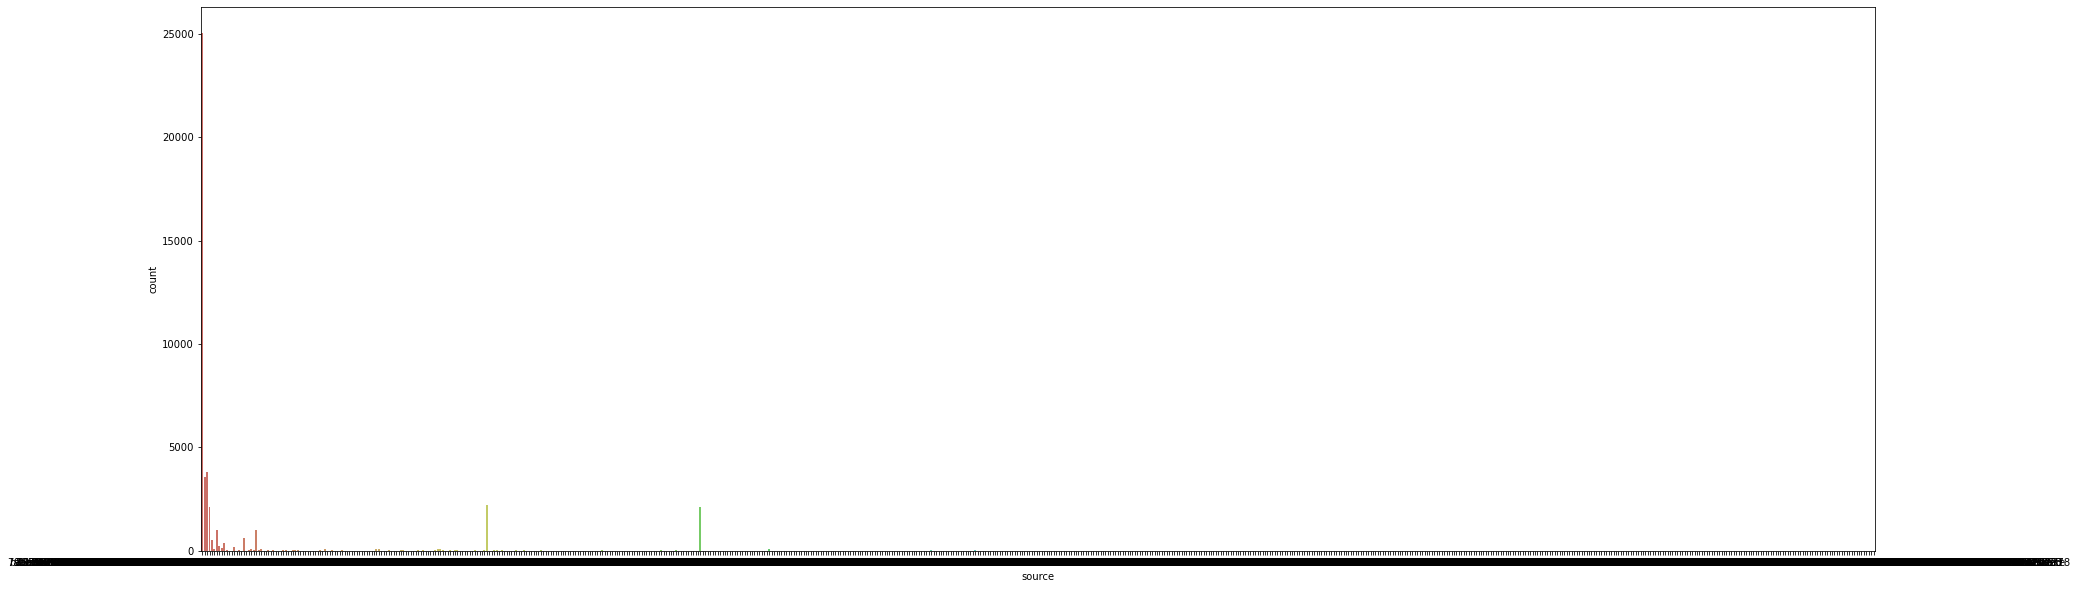

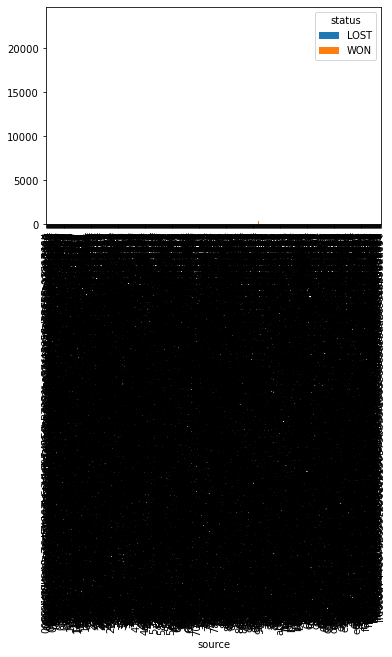

In [35]:
fig = plt.figure(figsize=(30,10))
sns.countplot(x="source",data=df,palette="hls",figure = fig)
pd.crosstab(df.source,df.status).plot(kind="bar")

###### We need to balance the data first because data is highly unbalanced and for the same we will use SMOTE

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [37]:
encoder = LabelEncoder()

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

In [39]:
df.head(10)

,status,lost_reason,budget,lease,source,room_type
0,0,21,1834,266,343,0
1,0,16,1834,266,343,0
2,0,21,1752,266,343,0
3,0,16,10,2,507,0
4,0,8,1834,266,343,0
5,0,29,831,306,349,0
6,0,25,10,2,432,0
7,0,29,1793,197,343,1
8,0,16,751,282,377,0
9,0,2,1218,197,432,0


In [40]:
X = df.drop(['status'],axis = 1)
Y = df['status']

###### Use Train Test Split

In [41]:
x_train_res,x_test,y_train_res,y_test = train_test_split(X,Y,test_size = 0.3,random_state =42)

In [42]:
sm = SMOTEENN()
x_train_res,y_train_res = sm.fit_resample(x_train_res,y_train_res)
y_train_res.value_counts()

0    26100
1    12796
Name: status, dtype: int64

#### Logistic Regression

In [43]:
model_LogR = LogisticRegression()
model_LogR.fit(x_train_res,y_train_res)

LogisticRegression()

In [44]:
y_predictLogR = model_LogR.predict(x_test)

In [45]:
model_scoreLogR =  model_LogR.score(x_train_res, y_train_res)  #training accuracy
model_scoreLogR 

0.7065250925545044

In [46]:
model_LogR.score(x_test , y_test)   #Testing accuracy

0.7856937248128958

In [47]:
print(classification_report(y_test,y_predictLogR))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     12993
           1       0.10      0.28      0.14       903

    accuracy                           0.79     13896
   macro avg       0.52      0.55      0.51     13896
weighted avg       0.89      0.79      0.83     13896



In [48]:
confusionMatrix_LogR = confusion_matrix(y_test,y_predictLogR)
confusionMatrix_LogR

array([[10668,  2325],
       [  653,   250]], dtype=int64)

<AxesSubplot:>

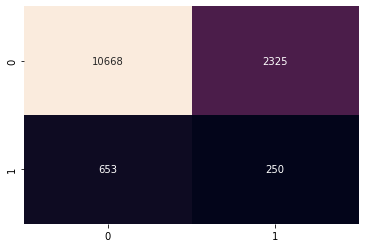

In [49]:
sns.heatmap(confusionMatrix_LogR,annot =True,fmt = 'd',cbar = False)

#### XGBoost 

In [50]:
model_XGB = xgb.XGBClassifier(n_estimators = 50,  max_depth = 20,learning_rate = 0.5)
model_XGB.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
y_predictXGB = model_XGB.predict(x_test)

In [52]:
model_scoreXGB = model_XGB.score(x_train_res , y_train_res) #training accuracy
model_scoreXGB

1.0

In [53]:
model_XGB.score(x_test,y_test)                                #Testing accuracy

0.9332901554404145

In [54]:
print(classification_report(y_test,y_predictXGB))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12993
           1       0.48      0.41      0.44       903

    accuracy                           0.93     13896
   macro avg       0.72      0.69      0.70     13896
weighted avg       0.93      0.93      0.93     13896



In [55]:
confusion_matrixXGB = confusion_matrix(y_test,y_predictXGB)
print(confusion_matrixXGB)

[[12598   395]
 [  532   371]]


<AxesSubplot:>

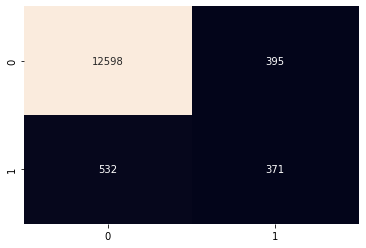

In [56]:
sns.heatmap(confusion_matrixXGB, annot=True, fmt = 'd', cbar = False)

#### SVC 

In [57]:
model_SVC = SVC(C=200,gamma=1)
model_SVC.fit(x_train_res,y_train_res)

SVC(C=200, gamma=1)

In [58]:
y_predictSVC = model_SVC.predict(x_test)

In [59]:
model_scoreSVC =  model_SVC.score(x_train_res , y_train_res)  #training accuracy
model_scoreSVC

1.0

In [60]:
model_SVC.score(x_test , y_test)        #Testing accuracy

0.777993667242372

In [61]:
print(classification_report(y_test,y_predictSVC))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     12993
           1       0.15      0.51      0.23       903

    accuracy                           0.78     13896
   macro avg       0.55      0.65      0.55     13896
weighted avg       0.91      0.78      0.83     13896



In [62]:
confusion_matrixSVC = confusion_matrix(y_test,y_predictSVC)
print(confusion_matrixSVC)

[[10350  2643]
 [  442   461]]


<AxesSubplot:>

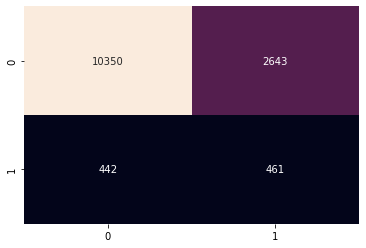

In [63]:
sns.heatmap(confusion_matrixSVC, annot=True, fmt = 'd', cbar = False)

### Random Forest Classifier

In [64]:
model_RF = RandomForestClassifier(n_estimators=105,criterion='gini',random_state=100,max_depth=11,min_samples_leaf=11)

In [65]:
model_RF.fit(x_train_res , y_train_res)

RandomForestClassifier(max_depth=11, min_samples_leaf=11, n_estimators=105,
                       random_state=100)

In [66]:
y_predictRF = model_RF.predict(x_test)

In [67]:
model_scoreRF = model_RF.score(x_train_res , y_train_res) #training accuracy
model_scoreRF

0.9780440148087207

In [68]:
model_RF.score(x_test,y_test)  #testing accuracy

0.9194732297063903

In [69]:
print(classification_report(y_test,y_predictRF))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12993
           1       0.39      0.45      0.42       903

    accuracy                           0.92     13896
   macro avg       0.68      0.70      0.69     13896
weighted avg       0.92      0.92      0.92     13896



In [70]:
confusion_matrixRF = confusion_matrix(y_test,y_predictRF)
print(confusion_matrixRF)

[[12373   620]
 [  499   404]]


<AxesSubplot:>

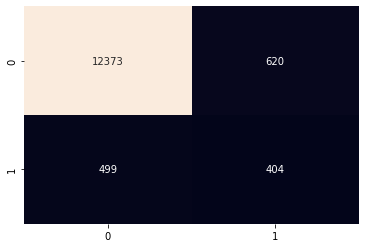

In [71]:
sns.heatmap(confusion_matrixRF, annot=True, fmt = 'd', cbar = False)

### Decision Tree Classifier

In [72]:
model_DT = DecisionTreeClassifier(criterion="gini",random_state=42,max_depth = 11, min_samples_leaf = 12)

In [73]:
model_DT.fit(x_train_res , y_train_res)
y_predictDT = model_DT.predict(x_test)

In [74]:
model_scoreDT = model_DT.score(x_train_res , y_train_res)
model_scoreDT

0.9779411764705882

In [75]:
print(classification_report(y_test,y_predictDT))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     12993
           1       0.40      0.44      0.42       903

    accuracy                           0.92     13896
   macro avg       0.68      0.70      0.69     13896
weighted avg       0.92      0.92      0.92     13896



In [76]:
confusion_matrix = confusion_matrix(y_test,y_predictDT)
print(confusion_matrix)

[[12386   607]
 [  505   398]]


<AxesSubplot:>

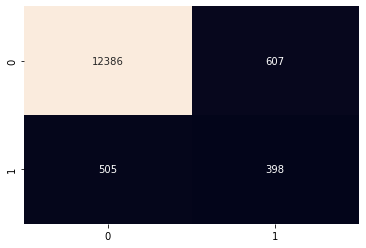

In [77]:
sns.heatmap(confusion_matrix, annot=True, fmt = 'd', cbar = False)

#### KNeighborsClassifier

In [78]:
model_KNN =  KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train_res,y_train_res)

KNeighborsClassifier()

In [79]:
y_predictKNN = model_KNN.predict(x_test)

In [80]:
model_scoreKNN = model_KNN.score(x_train_res , y_train_res) #training accuracy
model_scoreKNN

0.993906828465652

In [81]:
model_KNN.score(x_test,y_test)                                #Testing accuracy

0.8780944156591824

In [82]:
print(classification_report(y_test,y_predictKNN))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     12993
           1       0.22      0.35      0.27       903

    accuracy                           0.88     13896
   macro avg       0.59      0.63      0.60     13896
weighted avg       0.91      0.88      0.89     13896



In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrixKNN = confusion_matrix(y_test,y_predictKNN)
print(confusion_matrixKNN)

[[11890  1103]
 [  591   312]]


<AxesSubplot:>

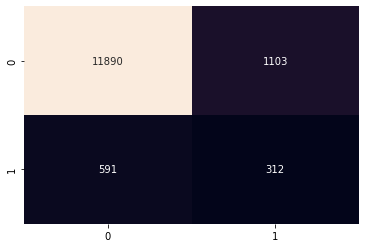

In [84]:
sns.heatmap(confusion_matrixKNN, annot=True, fmt = 'd', cbar = False)